In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gourd-detection-pdeu/Dataset/data.yaml
/kaggle/input/gourd-detection-pdeu/Dataset/Validation/labels.cache
/kaggle/input/gourd-detection-pdeu/Dataset/Validation/labels/Bitter gourd_Bitter-Gourd_1160_jpeg.rf.e3224672e33edfe8b0e8b96fb2f19f29.txt
/kaggle/input/gourd-detection-pdeu/Dataset/Validation/labels/Bottle gourd_Bottle-Gourd_803_jpg.rf.e9acf0f384184d1085445d2a663df009.txt
/kaggle/input/gourd-detection-pdeu/Dataset/Validation/labels/Ridge gourd_Ridge-Gourd_850_JPEG.rf.c8a21a09a8c66de4b458a734b1b3e7a8.txt
/kaggle/input/gourd-detection-pdeu/Dataset/Validation/labels/Ridge gourd_Ridge-Gourd_575_JPEG.rf.9b28f2b68ea57745ca9956e22d9599f5.txt
/kaggle/input/gourd-detection-pdeu/Dataset/Validation/labels/Sponge gourd_Spounge-Gourd_423_jpeg.rf.c86932ad5b5fa75c18df40fcd98f72e2.txt
/kaggle/input/gourd-detection-pdeu/Dataset/Validation/labels/Cucumber_Cucumber_1079_png.rf.7331d3d72dd61f70f0c3fd77fd1eaa88.txt
/kaggle/input/gourd-detection-pdeu/Dataset/Validation/labels/Sponge gourd_S

In [2]:
!pip install ultralytics
!pip install opencv-python
!pip install pandas
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 15.8 MB/s eta 0:00:00a 0:00:01


In [3]:
import numpy as np
import cv2
import os
import sys
import warnings
import shutil

from ultralytics import YOLO

warnings.filterwarnings("ignore")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
def print_dir_structure(root_dir, ignore_exts):
    for dirpath, dirnames, filenames in os.walk(root_dir):
        depth = dirpath.count(os.sep) - root_dir.count(os.sep)
        print('|   ' * depth + '|-- ', os.path.basename(dirpath) + '/')
        
        # Remove directories that contain only files with the specified extensions
        for ext in ignore_exts:
            filenames = [f for f in filenames if not f.endswith(ext)]
        
        # Print files in the directory
        for filename in filenames:
            print('|   ' * (depth + 1) + '|-- ', filename)

# Define the root directory and extensions to ignore
root_dir = '/kaggle/input/gourd-detection-pdeu/Dataset/'
ignore_exts = ['.txt', '.jpg']

# Print the directory structure
print_dir_structure(root_dir, ignore_exts)
print("Done")

|--  /
|   |--  data.yaml
|--  Validation/
|   |--  labels.cache
|   |--  labels/
|   |--  images/
|--  Test/
|   |--  labels/
|   |--  images/
|--  Train/
|   |--  labels.cache
|   |--  labels/
|   |--  images/
Done


In [5]:
model = YOLO('yolov8n.pt') 
# 8n can be replace with 8s, 8m, 8l, 8x

100%|██████████| 6.25M/6.25M [00:00<00:00, 70.3MB/s]


In [6]:
model.train(data = '/kaggle/input/gourd-detection-pdeu/Dataset/data.yaml', epochs=50, imgsz=640, patience=5)

Ultralytics 8.3.29 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/gourd-detection-pdeu/Dataset/data.yaml, epochs=50, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 13.5MB/s]
2024-11-13 06:08:38,916	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-13 06:08:39,717	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 62.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/gourd-detection-pdeu/Dataset/Train/labels... 2698 images, 1 backgrounds, 1 corrupt:  54%|█████▍    | 2698/4976 [00:14<00:12, 187.96it/s]


KeyboardInterrupt: 

In [ ]:
model.save("yolov8_weights.pt")

In [ ]:
import shutil
shutil.move("yolov8_weights.pt", "/kaggle/working/yolov8_weights.pt")

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load your YOLOv8 model (change 'yolov8_weights.pt' to your actual weights file)
model = YOLO('/kaggle/input/gourd-model-weights/yolov8_weights.pt/')

In [8]:
image_path = '/kaggle/input/image-test/vegetables.jpg'

In [5]:
bottle_1 = '/kaggle/input/gourd-detection-pdeu/Dataset/Test/images/Bottle gourd_Bottle-Gourd_1057_jpg.rf.ef6d9b2e6b5e40e0c6b9d0b99e5f3075.jpg'
bitter_1 = '/kaggle/input/gourd-detection-pdeu/Dataset/Test/images/Bitter gourd_Bitter-Gourd_1019_jpeg.rf.13e85faf6e29772e05781021657d801f.jpg'
ridge_1 = '/kaggle/input/gourd-detection-pdeu/Dataset/Test/images/Ridge gourd_Ridge-Gourd_1010_JPEG.rf.2459e2d113ac54d7939014c56db34d1e.jpg'
sponge_1 = '/kaggle/input/gourd-detection-pdeu/Dataset/Test/images/Sponge gourd_Spounge-Gourd_1189_jpg.rf.0842057932e6d874a7a1026ed4f192da.jpg'
cucumber_1 = '/kaggle/input/gourd-detection-pdeu/Dataset/Test/images/Cucumber_Cucumber_1024_jpg.rf.cae87e26844eed8df73cf3545099cac7.jpg'


image 1/1 /kaggle/input/gourd-detection-pdeu/Dataset/Test/images/Bottle gourd_Bottle-Gourd_1057_jpg.rf.ef6d9b2e6b5e40e0c6b9d0b99e5f3075.jpg: 640x640 1 Bottle gourd, 7.4ms
Speed: 9.2ms preprocess, 7.4ms inference, 229.9ms postprocess per image at shape (1, 3, 640, 640)


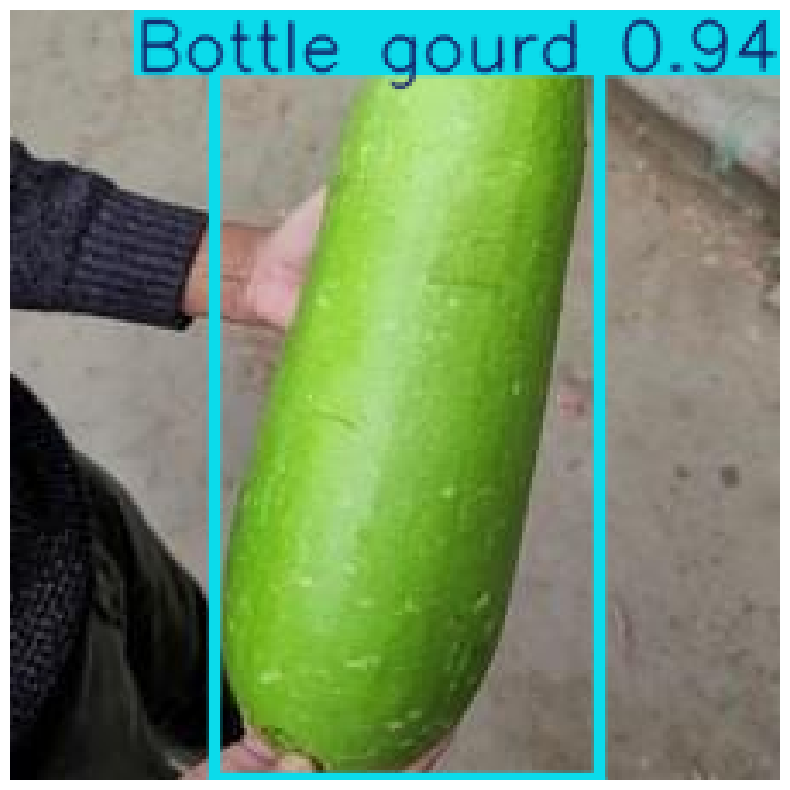

In [6]:
results = model(bottle_1)

# Extract the image with bounding boxes
annotated_image = results[0].plot()

# Plot the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



image 1/1 /kaggle/input/gourd-detection-pdeu/Dataset/Test/images/Bitter gourd_Bitter-Gourd_1019_jpeg.rf.13e85faf6e29772e05781021657d801f.jpg: 448x640 1 Bitter gourd, 38.2ms
Speed: 1.6ms preprocess, 38.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


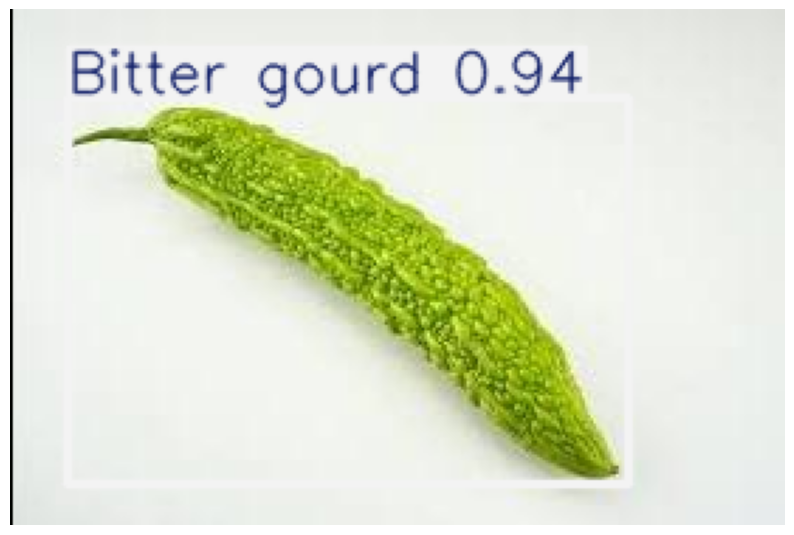

In [7]:
results = model(bitter_1)

# Display the image with bounding boxes
# Extract the image with bounding boxes
annotated_image = results[0].plot()

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


image 1/1 /kaggle/input/gourd-detection-pdeu/Dataset/Test/images/Sponge gourd_Spounge-Gourd_1189_jpg.rf.0842057932e6d874a7a1026ed4f192da.jpg: 640x640 2 Sponge gourds, 8.1ms
Speed: 1.6ms preprocess, 8.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


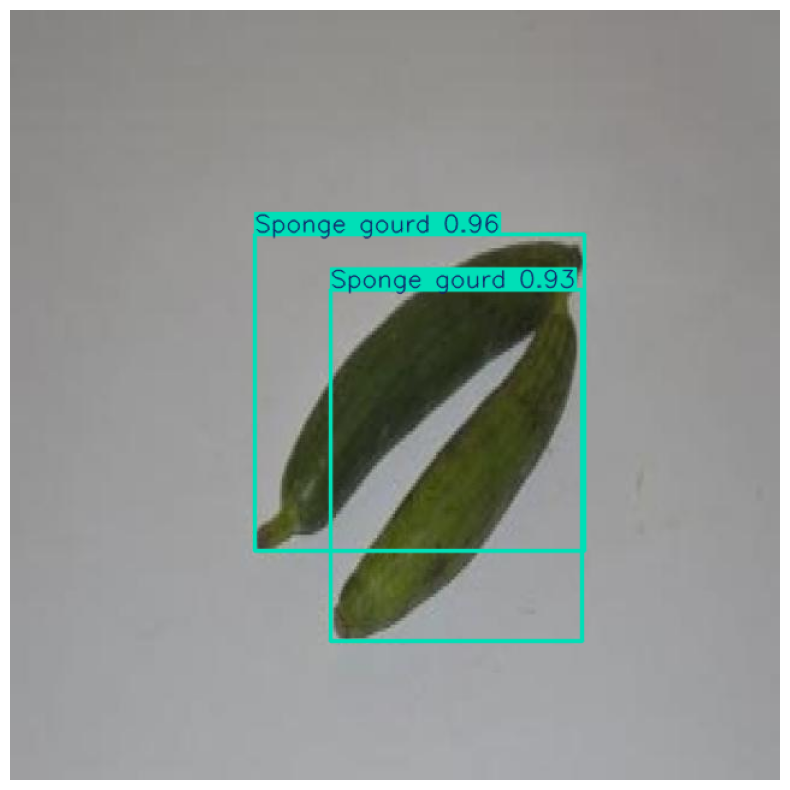

In [8]:
results = model(sponge_1)

# Display the image with bounding boxes
# Extract the image with bounding boxes
annotated_image = results[0].plot()

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


image 1/1 /kaggle/input/gourd-detection-pdeu/Dataset/Test/images/Cucumber_Cucumber_1024_jpg.rf.cae87e26844eed8df73cf3545099cac7.jpg: 640x640 8 Cucumbers, 7.4ms
Speed: 2.3ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


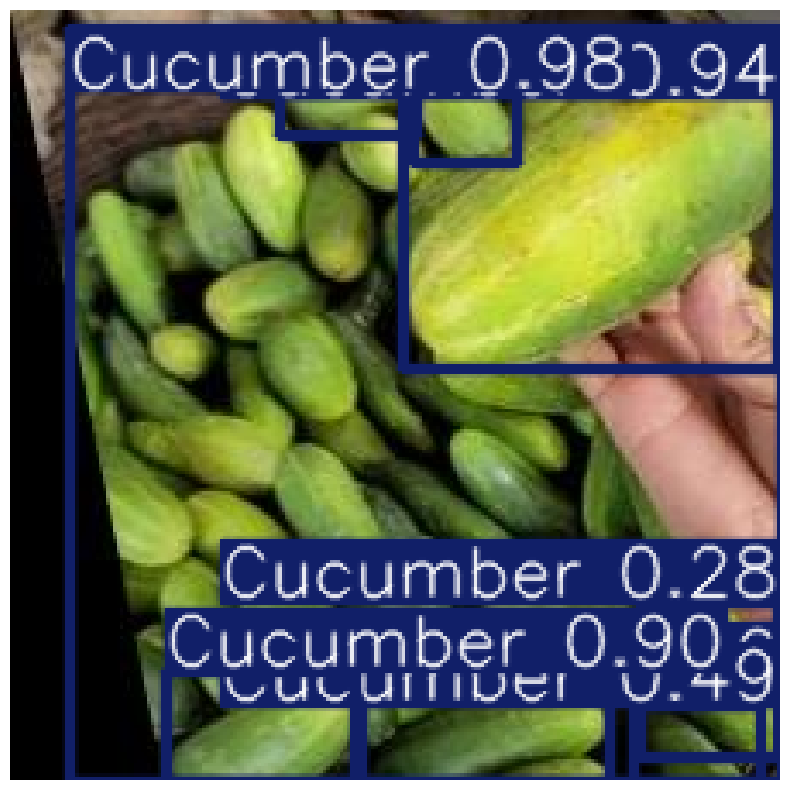

In [9]:
results = model(cucumber_1)

# Display the image with bounding boxes
# Extract the image with bounding boxes
annotated_image = results[0].plot()

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


image 1/1 /kaggle/input/gourd-detection-pdeu/Dataset/Test/images/Ridge gourd_Ridge-Gourd_1010_JPEG.rf.2459e2d113ac54d7939014c56db34d1e.jpg: 640x640 3 Ridge gourds, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


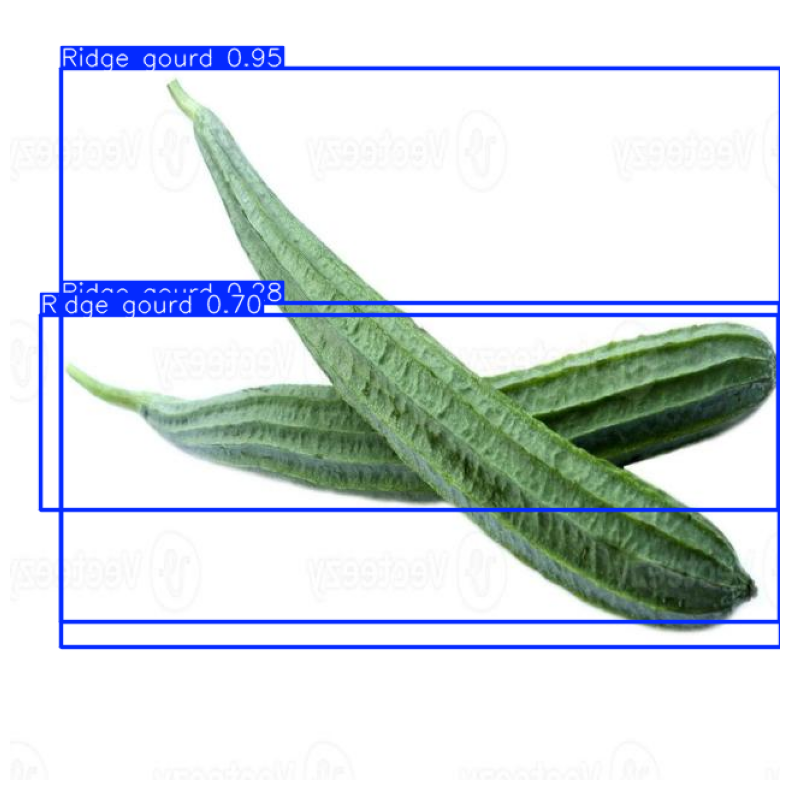

In [10]:
results = model(ridge_1)

# Display the image with bounding boxes
# Extract the image with bounding boxes
annotated_image = results[0].plot()

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import seaborn as sns

# Define class names and load your model
class_names = ['Cucumber', 'Bottle gourd', 'Bitter gourd', 'Ridge gourd', 'Sponge gourd']
model = YOLO('/kaggle/input/gourd-model-weights/yolov8_weights.pt')

# Paths
test_folder = '/kaggle/input/gourd-detection-pdeu/Dataset/Test/'

# Prepare lists to store actual and predicted labels
actual_labels = []
predicted_labels = []

# Loop through each image in the test folder
image_folder = os.path.join(test_folder, 'images')
for image_file in os.listdir(image_folder):
    if image_file.endswith('.jpg'):
        image_path = os.path.join(image_folder, image_file)
        
        # Perform inference on the image
        results = model(image_path)
        
        # Ground truth label - inferred from the file or directory name (adjust as needed)
        actual_class = image_file.split('_')[0]
        actual_labels.append(actual_class)
        
        # Check all predicted classes for this image
        if len(results[0].boxes) > 0:
            predicted_classes = [class_names[int(box.cls.item())] for box in results[0].boxes]
            predicted_labels.append(predicted_classes[0])  # Use most confident prediction
        else:
            predicted_labels.append("Unknown")

# Convert actual and predicted labels to numeric class indices for metrics calculation
actual_indices = [class_names.index(label) if label in class_names else -1 for label in actual_labels]
predicted_indices = [class_names.index(label) if label in class_names else -1 for label in predicted_labels]

# Calculate precision, recall, F1-score
precision, recall, f1, _ = precision_recall_fscore_support(actual_indices, predicted_indices, labels=range(len(class_names)), zero_division=0)

# Calculate accuracy per class
accuracy_per_class = []
for i, class_name in enumerate(class_names):
    class_accuracy = accuracy_score(np.array(actual_indices) == i, np.array(predicted_indices) == i)
    accuracy_per_class.append(class_accuracy)


image 1/1 /kaggle/input/gourd-detection-pdeu/Dataset/Test/images/Bottle gourd_Bottle-Gourd_575_jpg.rf.b4c954fe3f3961c6ecbc1ac202839603.jpg: 640x640 5 Bottle gourds, 1 Cucumber, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/gourd-detection-pdeu/Dataset/Test/images/Bitter gourd_Bitter-Gourd_936_jpg.rf.5f04962aaf55b18c8e03affd3b7bc58f.jpg: 480x640 1 Bitter gourd, 37.9ms
Speed: 2.7ms preprocess, 37.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/gourd-detection-pdeu/Dataset/Test/images/Cucumber_Cucumber_524_jpg.rf.a9d44de4f6eba5237c6934f01de7f2a9.jpg: 640x640 20 Cucumbers, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/gourd-detection-pdeu/Dataset/Test/images/Bitter gourd_Bitter-Gourd_405_jpg.rf.70c1cd3be44cd6928e0ab805fd32756a.jpg: 640x640 3 Bitter gourds, 7.4ms
Speed: 1.9ms preproces

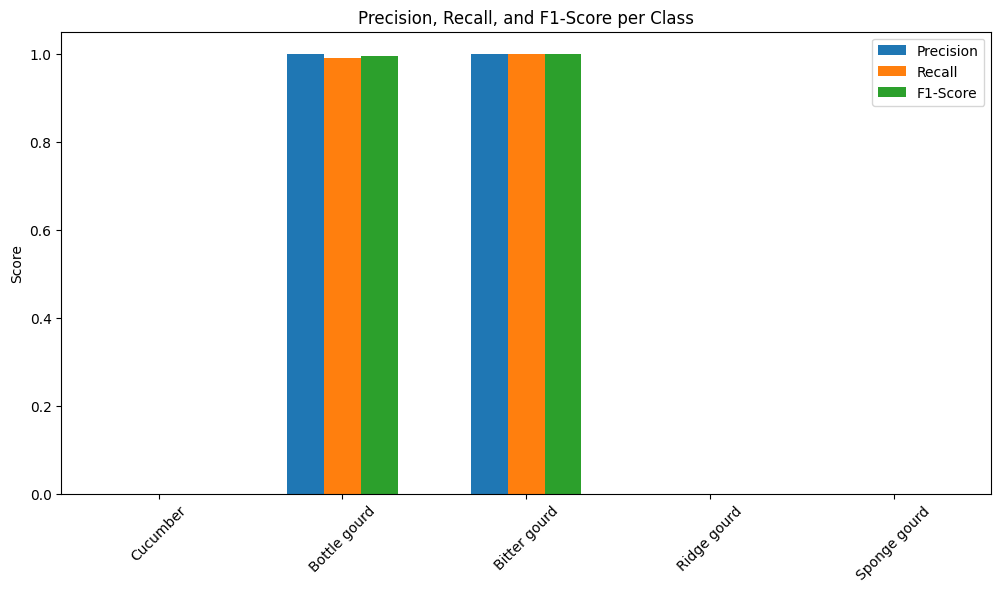

In [13]:
plt.figure(figsize=(12, 6))
x = np.arange(len(class_names))
width = 0.2
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1-Score')
plt.xticks(x, class_names, rotation=45)
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score per Class")
plt.legend()
plt.show()

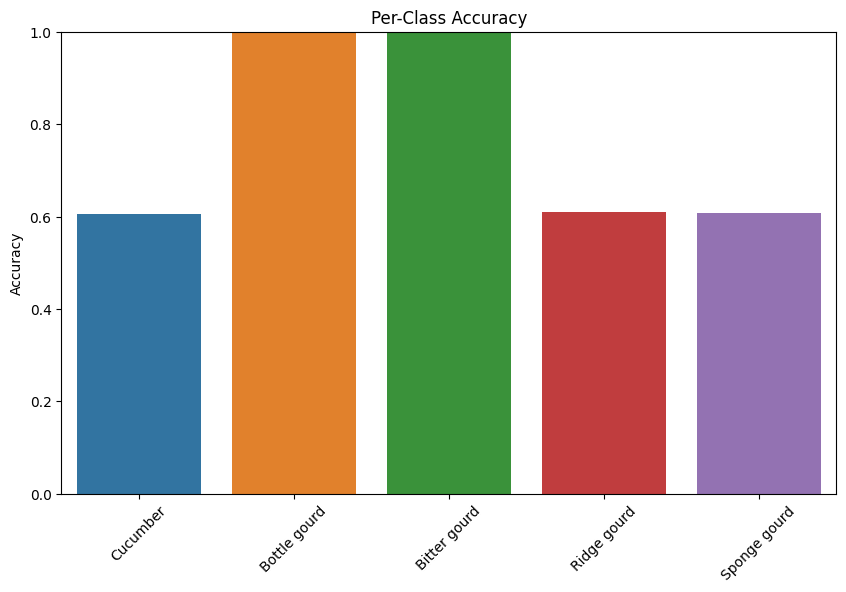

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=accuracy_per_class)
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy")
plt.ylim(0, 1)
plt.show()

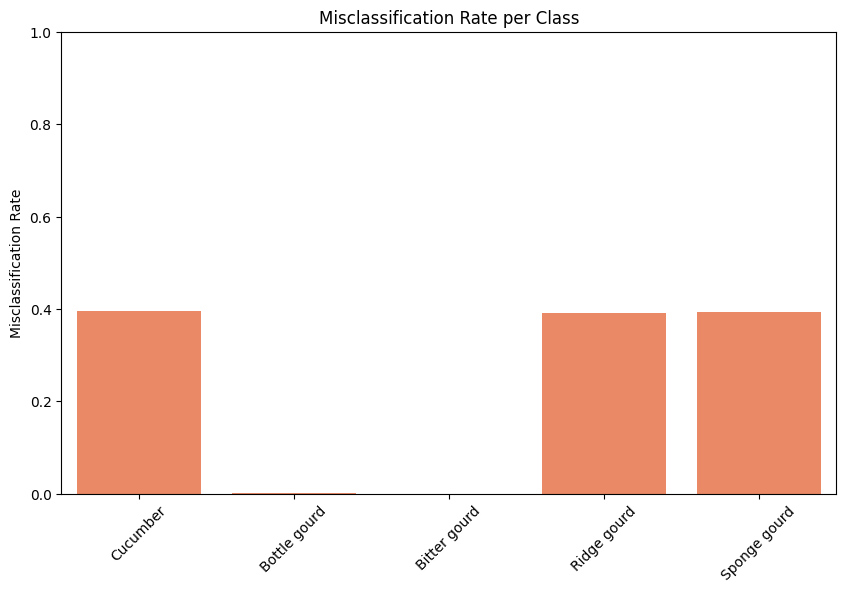

In [15]:
misclassification_rate = [1 - acc for acc in accuracy_per_class]
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=misclassification_rate, color="coral")
plt.xticks(rotation=45)
plt.ylabel("Misclassification Rate")
plt.title("Misclassification Rate per Class")
plt.ylim(0, 1)
plt.show()